# Model to Predict Purchase Behavior using KNN Algorithm

We have a dataset of 1000 customers here, containing information about their Gender, Age, Salary, Product ID, Customer ID, Price of product and also whether they have purchased it or not. This data shall be used to build a model to predict whether a new customer will purchase the product or not.

Python and its libraries are used for constructing the model. K Nearest Neighbors is used for prediction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# The Dataset

In [2]:
data = pd.read_csv('purchase_history.csv')

In [3]:
data.head()

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,Female,49,61000,P01,2000,1
1,2,Male,36,30000,P02,2000,1
2,3,Female,26,81000,P02,3500,1
3,4,Female,32,74000,P01,7000,0
4,5,Female,42,56000,P01,5000,0


In [4]:
data.shape

(1000, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1000 non-null   int64 
 1   Gender       1000 non-null   object
 2   Age          1000 non-null   int64 
 3   Salary       1000 non-null   int64 
 4   Product ID   1000 non-null   object
 5   Price        1000 non-null   int64 
 6   Purchased    1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


The dataset contains all numerical values except Gender and Product ID columns.

#### Checking for Missing Values

In [6]:
data.isnull().sum()

Customer ID    0
Gender         0
Age            0
Salary         0
Product ID     0
Price          0
Purchased      0
dtype: int64

#### Checking for Duplicate values

In [8]:
data.duplicated().value_counts()

False    1000
Name: count, dtype: int64

## Feature Engineering

#### Converting the Gender Column into Numerical

We shall be using the Gender information of the customer for our analysis therefore it is crucial to convert this variable into a numerical one.

In [12]:
data = data.replace({'Gender':{'Female':0, 'Male':1}})

In [13]:
data.head()

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,0,49,61000,P01,2000,1
1,2,1,36,30000,P02,2000,1
2,3,0,26,81000,P02,3500,1
3,4,0,32,74000,P01,7000,0
4,5,0,42,56000,P01,5000,0


#### Looking at Summary Statistics

In [11]:
data.describe()

,Customer ID,Gender,Age,Salary,Price,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.477000,40.989000,58667.000000,4435.500000,0.414000
std,288.819436,0.499721,13.738837,23615.372044,1847.973148,0.492795
min,1.000000,0.000000,18.000000,20000.000000,2000.000000,0.000000
25%,250.750000,0.000000,29.000000,38000.000000,3500.000000,0.000000
50%,500.500000,0.000000,40.000000,59000.000000,5000.000000,0.000000
75%,750.250000,1.000000,53.000000,80000.000000,7000.000000,1.000000
max,1000.000000,1.000000,64.000000,100000.000000,7000.000000,1.000000


#### Choosing the Target and Features

The Target variable is Purchased; a categorical variable and the Features are - Gender, Age, Salary, Price. Also note that since the Target is a categorical variable we shall be using Classification model for predicting.

In [15]:
X = data.drop(['Customer ID','Product ID','Purchased'],axis=1)
y= data['Purchased']

In [16]:
X

,Gender,Age,Salary,Price
0,0,49,61000,2000
1,1,36,30000,2000
2,0,26,81000,3500
3,0,32,74000,7000
4,0,42,56000,5000
...,...,...,...,...
995,1,21,73000,5000
996,1,62,54000,5000
997,0,41,20000,2000
998,1,22,29000,5000


In [17]:
y

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    0
997    0
998    0
999    0
Name: Purchased, Length: 1000, dtype: int64

#### Checking for Multicollinearity

It is crucial to check whether the features suffer from multicollinearity. Here we will check it with the help of scatterplot and heatmap.

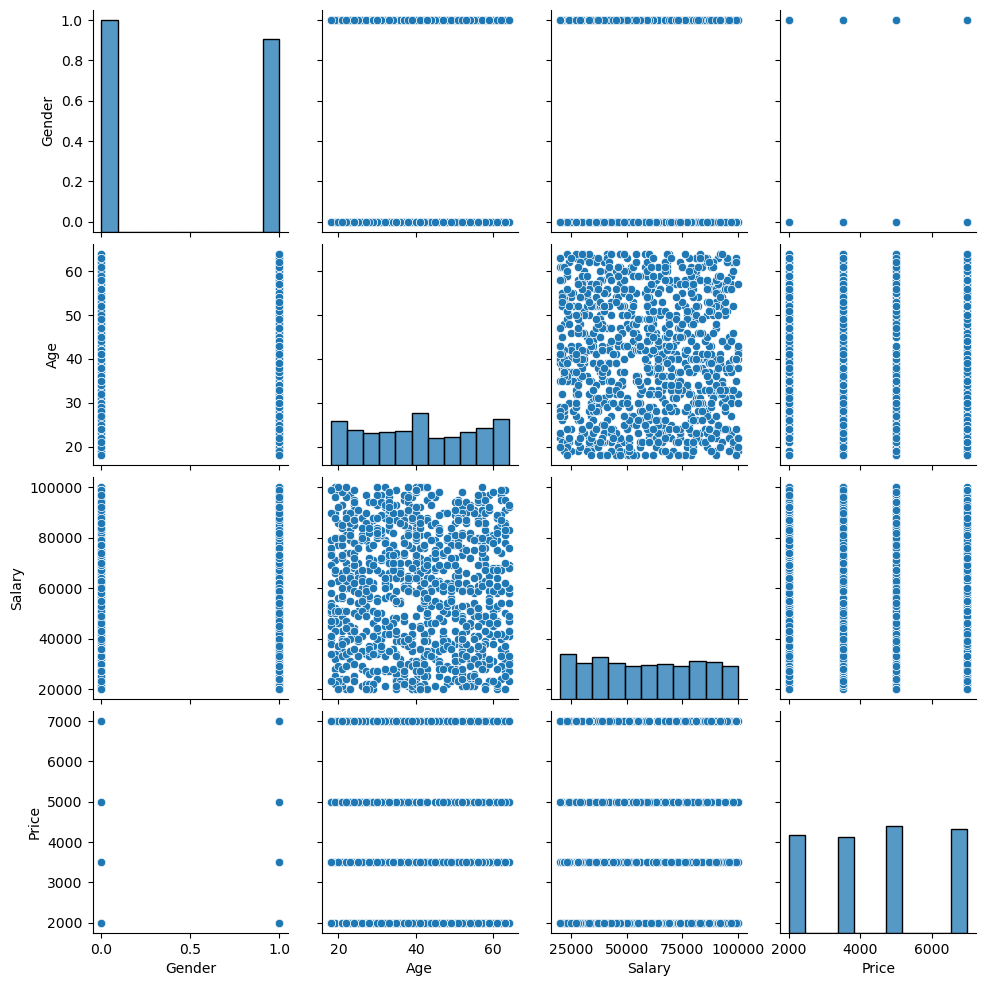

In [18]:
sns.pairplot(X)

<Axes: >

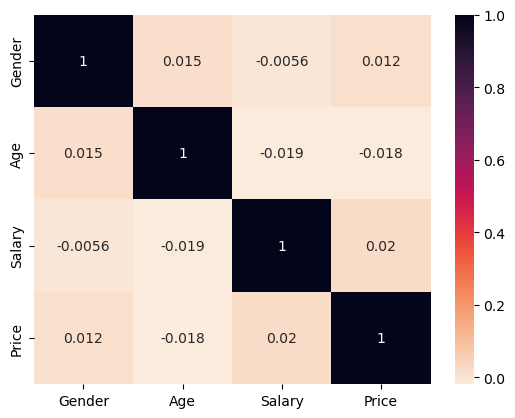

In [20]:
sns.heatmap(X.corr(), annot =True, cmap='rocket_r')

With the help of this Heatmap and Pairplots we can see that none of the features have a very strong relationship / correlation with each other, so we can rule out multicollinearity and go ahead with these selected Features.

## Building the Model

#### Splitting the Data into Training and Test Set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Scaling the Features Data for running KNN Algorithm

Since we are using KNN it is an algorithm which will calculate the distance between points, it is crucial for us to scale our data. That way we can prevent very large distances from dominating and biasing our calculations. And we scale our data after we split it.

In [27]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)

#### Training the model using K Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

In [29]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

#### Using the Model to predict

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0], dtype=int64)

## Evaluating the Model

#### Using Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

#### Looking at the F1 and Accuracy score

In [32]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.755


In [33]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))

0.6956521739130435
